In [1]:
%matplotlib inline
# Standard modules
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import numpy as np
from dask.distributed import Client
#from cosima_cookbook import distributed as ccd
# Optional modules
import xgcm
# Ignore warnings
import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)
from joblib import Parallel, delayed

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 250.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39471,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 250.00 GiB
Comm: tcp://127.0.0.1:42327,Total threads: 4
Dashboard: /proxy/40051/status,Memory: 62.50 GiB
Nanny: tcp://127.0.0.1:33481,


In [3]:
# Load database
#session = cc.database.create_session('/g/data/ik11/databases/ryf9091.db')
session = cc.database.create_session()
# Define experiment in database
expt = '01deg_jra55v13_ryf9091'

start_time = '2150-01-01' 
end_time   = '2159-12-31'

lat_slice  = slice(-80,-59)

In [4]:
isobath_depth = 1000
# Load the isobath information
file_path = '/g/data/x77/wgh581/Post_Process/Antarctic_slope_contour_u_t_' + str(isobath_depth) + 'm_plt_approach.npz'
data = np.load(file_path)
# We are interested in the t-grid:
num_points = data['num_points_t']
distance_along_contour = data['distance_along_contour_t']
lon_along_contour = data['lon_along_contour_t']
lat_along_contour = data['lat_along_contour_t']

## salt

In [5]:
salt_con = cc.querying.getvar(expt, 'salt', session, frequency = '1 monthly',
                              start_time = start_time, end_time = end_time)
salt_con = salt_con.sel(yt_ocean = lat_slice).sel(time=slice(start_time, end_time)).mean('time')                             
salt_con = salt_con.load()

2023-04-12 14:16:05,575 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-04-12 14:16:10,744 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


In [7]:
def get_salt_along_contour(ii):
    return salt_con.sel(xt_ocean=lon_along_contour[ii], method='nearest').sel(yt_ocean=lat_along_contour[ii], method='nearest').values

In [8]:
results = Parallel(n_jobs=-1)(delayed(get_salt_along_contour)(ii) for ii in range(num_points))

In [9]:
salt_along_contour = np.zeros((len(salt_con['st_ocean']), num_points))
for ii in range(num_points):
    salt_along_contour[:, ii] = results[ii]

In [10]:
salt_darray = xr.DataArray(salt_along_contour[:,:-1], name = 'salt', dims = ['st_ocean', 'lon_along_contour'],
                           coords = {'st_ocean':salt_con['st_ocean'], 'lon_along_contour':lon_along_contour[:-1]})
salt_darray.to_netcdf('salt.nc')

(-1000.0, 0.0)

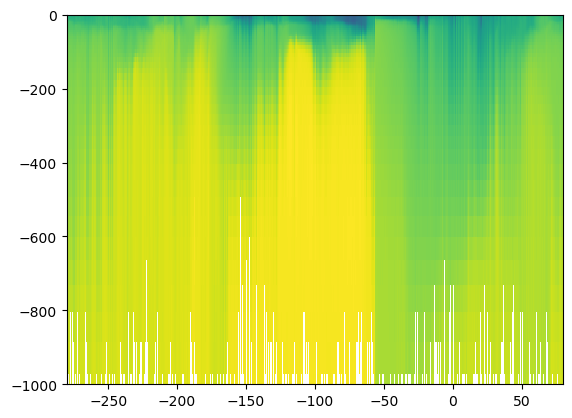

In [15]:
plt.pcolormesh(salt_darray['lon_along_contour'], -salt_darray['st_ocean'], salt_darray)
plt.ylim(-1000,0)

## temp

In [16]:
temp_con = cc.querying.getvar(expt, 'temp', session, frequency = '1 monthly',
                              start_time = start_time, end_time = end_time)
temp_con = temp_con.sel(yt_ocean = lat_slice).sel(time=slice(start_time, end_time)).mean('time')                             
temp_con = temp_con.load()

2023-04-12 14:18:10,493 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-04-12 14:18:11,544 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-04-12 14:18:11,546 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-04-12 14:18:12,023 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-04-12 14:18:12,047 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-04-12 14:18:31,271 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-04-12 14:18:32,755 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-04-12 14:18:47,793 - distributed.utils_perf - WARNING - full garbage collections took

In [17]:
def get_temp_along_contour(ii):
    return temp_con.sel(xt_ocean=lon_along_contour[ii], method='nearest').sel(yt_ocean=lat_along_contour[ii], method='nearest').values

In [18]:
results = Parallel(n_jobs=-1)(delayed(get_temp_along_contour)(ii) for ii in range(num_points))

In [19]:
temp_along_contour = np.zeros((len(temp_con['st_ocean']), num_points))
for ii in range(num_points):
    temp_along_contour[:, ii] = results[ii]

In [20]:
temp_darray = xr.DataArray(temp_along_contour[:,:-1], name = 'temp', dims = ['st_ocean', 'lon_along_contour'],
                           coords = {'st_ocean':salt_con['st_ocean'], 'lon_along_contour':lon_along_contour[:-1]})
temp_darray.to_netcdf('temp.nc')

(-1000.0, 0.0)

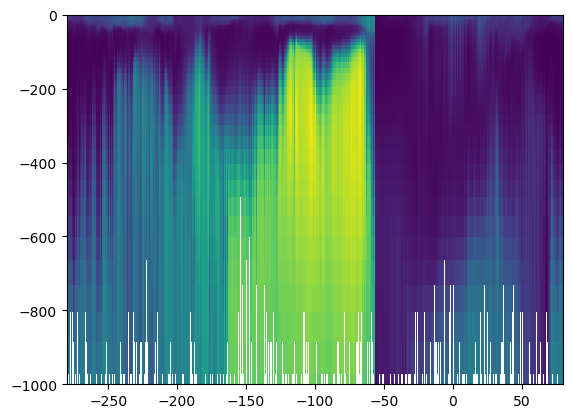

In [21]:
plt.pcolormesh(temp_darray['lon_along_contour'], -temp_darray['st_ocean'], temp_darray)
plt.ylim(-1000,0)

## prho

In [22]:
prho_con = cc.querying.getvar(expt, 'pot_rho_0', session, frequency = '1 monthly',
                              start_time = start_time, end_time = end_time)
prho_con = prho_con.sel(yt_ocean = lat_slice).sel(time=slice(start_time, end_time)).mean('time')                             
prho_con = prho_con.load()

2023-04-12 14:24:19,158 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-04-12 14:24:19,185 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-04-12 14:24:19,256 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-04-12 14:24:19,690 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-04-12 14:24:19,792 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-04-12 14:24:19,875 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-04-12 14:24:51,425 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-04-12 14:24:53,707 - distributed.utils_perf - WARNING - full garbage collections took

In [23]:
def get_prho_along_contour(ii):
    return prho_con.sel(xt_ocean=lon_along_contour[ii], method='nearest').sel(yt_ocean=lat_along_contour[ii], method='nearest').values

In [24]:
results = Parallel(n_jobs=-1)(delayed(get_prho_along_contour)(ii) for ii in range(num_points))

In [25]:
prho_along_contour = np.zeros((len(prho_con['st_ocean']), num_points))
for ii in range(num_points):
    prho_along_contour[:, ii] = results[ii]

In [26]:
prho_darray = xr.DataArray(prho_along_contour[:,:-1], name = 'pot_rho_0', dims = ['st_ocean', 'lon_along_contour'],
                           coords = {'st_ocean':salt_con['st_ocean'], 'lon_along_contour':lon_along_contour[:-1]})
prho_darray.to_netcdf('prho.nc')

(-1000.0, 0.0)

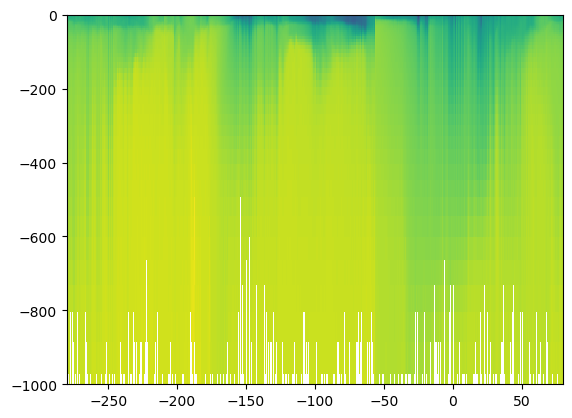

In [27]:
plt.pcolormesh(prho_darray['lon_along_contour'], -prho_darray['st_ocean'], prho_darray)
plt.ylim(-1000,0)

# woa

In [5]:
import glob

In [19]:
salt_woa = xr.open_mfdataset(np.sort(glob.glob('/g/data/ik11/observations/woa18/woa18_A5B7_s*.nc')))
salt_woa = salt_woa['s_an'].mean('time').rename({'lat':'yt_ocean','lon':'xt_ocean'})

salt_woa['xt_ocean'] = xr.where(salt_woa['xt_ocean'] > 80, salt_woa['xt_ocean'] - 360, salt_woa['xt_ocean']).values

salt_woa = salt_woa.sortby('xt_ocean')

In [20]:
salt_woa = salt_woa.load()

In [21]:
def get_salt_along_contour(ii):
    return salt_woa.sel(xt_ocean=lon_along_contour[ii], method='nearest').sel(yt_ocean=lat_along_contour[ii], method='nearest').values

In [22]:
results = Parallel(n_jobs=-1)(delayed(get_salt_along_contour)(ii) for ii in range(num_points))

In [23]:
salt_woa_along_contour = np.zeros((len(salt_woa['depth']), num_points))
for ii in range(num_points):
    salt_woa_along_contour[:, ii] = results[ii]

In [26]:
salt_woa_darray = xr.DataArray(salt_woa_along_contour[:,:-1], name = 'salt', dims = ['depth', 'lon_along_contour'],
                               coords = {'depth':salt_woa['depth'], 'lon_along_contour':lon_along_contour[:-1]})
salt_woa_darray.to_netcdf('salt_woa.nc')

(-1000.0, 0.0)

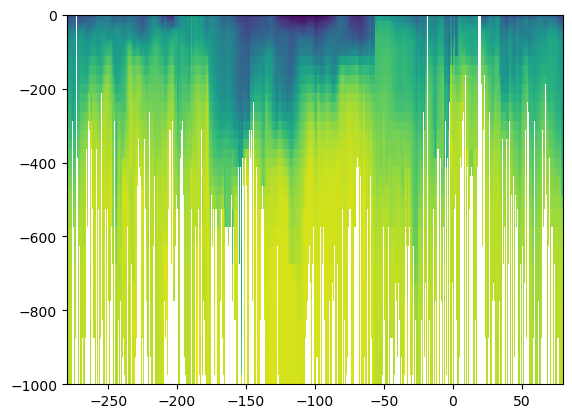

In [27]:
plt.pcolormesh(salt_woa_darray['lon_along_contour'], -salt_woa_darray['depth'], salt_woa_darray)
plt.ylim(-1000,0)

In [28]:
temp_woa = xr.open_mfdataset(np.sort(glob.glob('/g/data/ik11/observations/woa18/woa18_A5B7_t*.nc')))
temp_woa = temp_woa['t_an'].mean('time').rename({'lat':'yt_ocean','lon':'xt_ocean'})

temp_woa['xt_ocean'] = xr.where(temp_woa['xt_ocean'] > 80, temp_woa['xt_ocean'] - 360, temp_woa['xt_ocean']).values

temp_woa = temp_woa.sortby('xt_ocean')

In [29]:
temp_woa = temp_woa.load()

In [30]:
def get_salt_along_contour(ii):
    return temp_woa.sel(xt_ocean=lon_along_contour[ii], method='nearest').sel(yt_ocean=lat_along_contour[ii], method='nearest').values

In [31]:
results = Parallel(n_jobs=-1)(delayed(get_salt_along_contour)(ii) for ii in range(num_points))

In [32]:
temp_woa_along_contour = np.zeros((len(temp_woa['depth']), num_points))
for ii in range(num_points):
    temp_woa_along_contour[:, ii] = results[ii]

In [33]:
temp_woa_darray = xr.DataArray(temp_woa_along_contour[:,:-1], name = 'salt', dims = ['depth', 'lon_along_contour'],
                               coords = {'depth':temp_woa['depth'], 'lon_along_contour':lon_along_contour[:-1]})
temp_woa_darray.to_netcdf('salt_woa.nc')

(-1000.0, 0.0)

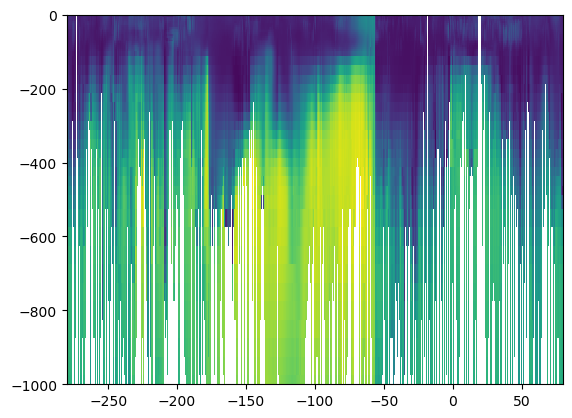

In [34]:
plt.pcolormesh(temp_woa_darray['lon_along_contour'], -temp_woa_darray['depth'], temp_woa_darray)
plt.ylim(-1000,0)

In [36]:
salt = xr.open_dataarray('salt.nc')
temp = xr.open_dataarray('temp.nc')

In [39]:
import matplotlib.gridspec as gridspec

In [44]:
import cmocean.cm as cmocean

In [59]:
import gsw

In [71]:
p = gsw.p_from_z(-salt_woa_darray['depth'], salt_woa_darray['lon_along_contour'])

In [72]:
SA = gsw.SA_from_SP(salt_woa_darray,p[-1,:],salt_woa_darray['lon_along_contour'],lat_along_contour[:-1])

In [73]:
CT = gsw.CT_from_t(SA,temp_woa_darray,p)

In [47]:
# Figure path
# Panel labels
panel_name = ['a)', 'b)', 'c)', 'd)']
# Font size
plt.rcParams['font.size'] = 18
# Axes
plt.rcParams['axes.facecolor']  = 'white'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
# Saving parameters
plt.rcParams['savefig.dpi']  = 150
plt.rcParams['savefig.bbox'] = 'tight'

In [ ]:
fig = plt.figure(figsize=(15, 17))
# Panel title
title_name = ['Observations', 'CONTROL', 'Observations', 'CONTROL']
# Subplots grid
gs  = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1], width_ratios=[1, 0.025], wspace=0.05)
    
for ii in range(4):
    if ii == 0:
        ax = fig.add_subplot(gs[ii])
        ax.set_title(panel_name[ii], loc='left', fontweight='bold')    
        ax.set_xlim([-280, 80])
        ax.set_ylim([-1000, None])
        ax.set_title(title_name[ii])
        cf = ax.pcolormesh(CT['lon_along_contour'], -CT['depth'], CT, 
                           cmap=cmocean.balance, vmin=-2, vmax=2) 
    elif ii == 1:
        ax = fig.add_subplot(gs[ii+1])
        ax.set_title(panel_name[ii], loc='left', fontweight='bold')    
        ax.set_xlim([-280, 80])
        ax.set_ylim([-1000, None])
        ax.set_title(title_name[ii])
        cf = ax.pcolormesh(temp['lon_along_contour'], -temp['st_ocean'], temp-273.15, 
                           cmap=cmocean.balance, vmin=-2, vmax=2) 
    elif ii == 2:
        ax = fig.add_subplot(gs[ii+2])
        ax.set_title(panel_name[ii], loc='left', fontweight='bold')    
        ax.set_xlim([-280, 80])
        ax.set_ylim([-1000, None])
        ax.set_title(title_name[ii])
        CF = ax.pcolormesh(salt_woa_darray['lon_along_contour'], -salt_woa_darray['depth'], salt_woa_darray, cmap=cmocean.haline, vmin=34.2, vmax=34.8) 
    elif ii == 3:
        # Salt, WIND-
        ax = fig.add_subplot(gs[ii+3])
        ax.set_title(panel_name[ii], loc='left', fontweight='bold')    
        ax.set_xlim([-280, 80])
        ax.set_ylim([-1000, None])
        ax.set_title(title_name[ii])
        CF = ax.pcolormesh(salt['lon_along_contour'], -salt['st_ocean'], salt, cmap=cmocean.haline, vmin=34.2, vmax=34.8) 
        plt.xlabel('Longitude ($^{\circ}$E)')
        ax.set_ylim(-1000,None)
    plt.ylabel('Depth (m)')
    if ii < 3:
        plt.tick_params(labelbottom=False)
        
# Add colorbars
cbar_ax = fig.add_subplot(gs[0:2, -1])
cbar = plt.colorbar(cf, cax=cbar_ax, fraction=0.03, pad=0.01, extend='both')
cbar.set_label('Temperature ($^{\circ}$C)')
cbar_ax = fig.add_subplot(gs[2:, -1])
cbar = plt.colorbar(CF, cax=cbar_ax, fraction=0.03, pad=0.01, extend='both')
cbar.set_label('Salinity ')

# Finished
save_fig = 1
if save_fig == 1:
    fig_name = 'SuppFig2_1000m_TS_obs.png'
    plt.savefig(fig_name, bbox_inches = 'tight')